In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from pandas import Series, DataFrame
import seaborn as sns
from sklearn import datasets
from sklearn import svm
%matplotlib inline
    
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from pandas import Series, DataFrame
import seaborn as sns
from patsy import dmatrices
import sklearn.ensemble as ske
from sklearn import datasets
from sklearn.decomposition import PCA
from scipy.stats import norm
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
from scipy.stats import boxcox
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from pandas import Series, DataFrame
%matplotlib inline    
from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
import statsmodels.api as sm
from pandas import Series, DataFrame
import seaborn as sns
from patsy import dmatrices
import sklearn.ensemble as ske
from sklearn import datasets
from scipy.stats import norm
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
from scipy.stats import boxcox
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.model_selection import train_test_split
import json

In [94]:
# reading the JSON data using json.load()
file = 'result.json'
dict_train=[]
with open(file) as train_file:
    dict_train = json.load(train_file)

# converting json dataset from dictionary to dataframe
train = pd.DataFrame.from_dict(dict_train)


In [95]:
goal=train.loc[train['group'] != 1]
# goal=goal.loc[goal['numofcores'] != 1]

In [96]:
goal

,id,time,cpuname,memusage,cpuusage,arch,timestamp,numofcores,hostname,username,group
3,74,739.87,Intel(R) Core(TM) i5-5300U CPU @ 2.30GHz,983516,101,x86_64,2019-11-23T17:43:28.020Z,2,jany-Latitude-E7450,root,Physical machine
4,73,977.64,Intel(R) Core(TM) i5-5300U CPU @ 2.30GHz,983224,99,x86_64,2019-11-23T17:30:49.907Z,2,jany-Latitude-E7450,root,Physical machine
5,72,969.60,Intel(R) Core(TM) i5-5300U CPU @ 2.30GHz,983148,98,x86_64,2019-11-23T17:14:10.632Z,2,jany-Latitude-E7450,root,Physical machine
6,71,789.41,Intel(R) Core(TM) i5-5300U CPU @ 2.30GHz,983456,100,x86_64,2019-11-23T16:57:40.642Z,2,jany-Latitude-E7450,root,Physical machine
7,70,1264.77,Intel(R) Core(TM) i5-5300U CPU @ 2.30GHz,983288,99,x86_64,2019-11-23T16:44:12.238Z,1,jany-Latitude-E7450,root,Physical machine
...,...,...,...,...,...,...,...,...,...,...,...
61,15,615.79,Intel(R) Core(TM) i5-5300U CPU @ 2.30GHz,983216,97,x86_64,2019-11-14T11:32:36.494Z,3,jany-Latitude-E7450,root,Physical machine
62,14,623.21,Intel(R) Core(TM) i5-5300U CPU @ 2.30GHz,991396,88,x86_64,2019-11-14T11:15:39.866Z,4,e02ec2185b09,docker,Docker
63,12,1026.34,Intel(R) Core(TM) i5-5300U CPU @ 2.30GHz,991264,68,x86_64,2019-11-14T00:24:01.056Z,4,2a859360a398,docker,Docker
64,11,814.26,Intel(R) Core(TM) i5-5300U CPU @ 2.30GHz,991344,75,x86_64,2019-11-13T23:56:09.096Z,4,ea03907378da,docker,Docker


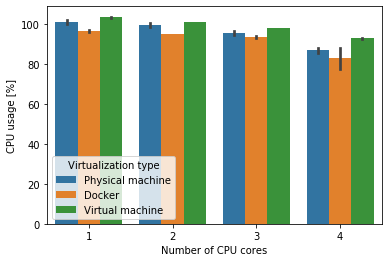

In [97]:

ax = sns.barplot(x="numofcores", y="cpuusage",hue="group", data=goal)
ax.set(xlabel='Number of CPU cores', ylabel='CPU usage [%]')
ax.legend(title='Virtualization type')
ax.get_figure().savefig("cmp_cpu_plot.png")

In [110]:
goal=train.loc[train['group'] != 1]
# goal_core1=goal.loc[goal['numofcores'] == 1]
goal_core1['time'].mean()

37898.83

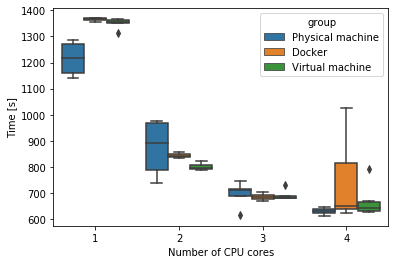

In [112]:
ax = sns.boxplot(x="numofcores", y="time",hue="group", data=goal)
ax.set(xlabel='Number of CPU cores', ylabel='Time [s]')
ax.get_figure().savefig("boxplot.png")

In [100]:
fake=train.loc[train['group'] == 1]
fake_core1=fake.loc[fake['numofcores'] == 1]
fake_core1['cpuusage'].mean()

98.0

In [101]:
fake=train.loc[train['group'] == 1]
fake_core1=fake.loc[fake['numofcores'] == 2]
fake_core1['cpuusage'].mean()

97.0

In [102]:
fake=train.loc[train['group'] == 1]
fake_core1=fake.loc[fake['numofcores'] == 3]
fake_core1['cpuusage'].mean()

29.0

In [103]:
fake=train.loc[train['group'] == 1]
# fake_core1=fake.loc[fake['numofcores'] == 4]
fake_core1

,id,time,cpuname,memusage,cpuusage,arch,timestamp,numofcores,hostname,username,group
1,76,20376.45,QEMU Virtual CPU version 2.5+,946512,29,i686,2019-11-24T11:21:23.548Z,3,debian,root,1


In [90]:
fake['memusage'].mean()

946402.75

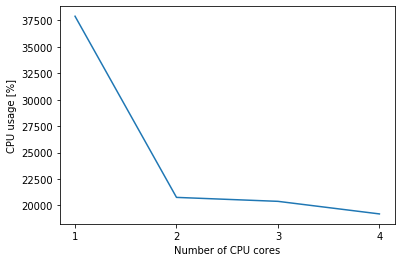

In [113]:
ax = sns.lineplot(x="numofcores", y="time", data=fake)
ax.set(xlabel='Number of CPU cores', ylabel='CPU usage [%]')
ax.set(xticks=[1,2,3,4])
ax.get_figure().savefig("time_sw.png")

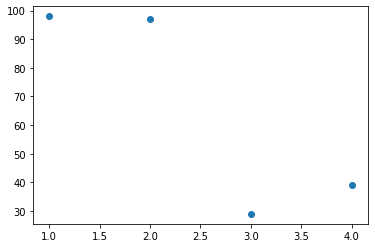

In [9]:
import matplotlib.pyplot as plt 
plt.scatter(fake['numofcores'], fake['cpuusage'])

In [25]:
# fake.to_json(r'array.json')
fake_file = 'array.json'
fake_train=[]
with open(fake_file) as fake_file:
    fake_train = json.load(fake_file)

# converting json dataset from dictionary to dataframe
fake_train = pd.DataFrame.from_dict(fake_train)

[Text(0, 0.5, 'Time [s]'), Text(0.5, 0, 'Number of CPU cores')]

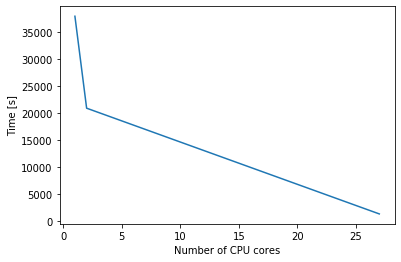

In [27]:
ax = sns.lineplot(x="numofcores", y="time", data=fake_train)
ax.set(xlabel='Number of CPU cores', ylabel='Time [s]')

In [28]:
ax.get_figure().savefig("sw_prediction.png")

In [65]:
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
import pickle
from sklearn.model_selection import train_test_split
fake, target = fake_train[fake_train.columns[fake_train.columns != 'numofcores']], fake_train['numofcores']
X_train, X_test, Y_train, Y_test = train_test_split(fake, target, test_size=0.3, random_state=0)

In [66]:
d = {'time': [1350,1700], 'memusage': [948503, 988503], 'cpuusage': [65, 33]}
df = pd.DataFrame(data=d)
target

0     27
1     26
2     25
3     24
4     23
5     22
6     21
7     20
8     19
9     18
10    17
11    16
12    15
13    14
14    13
15    12
16    11
17    10
18     9
19     8
20     7
21     6
22     5
23     4
24     3
25     2
26     1
Name: numofcores, dtype: int64

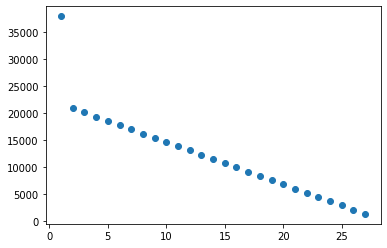

In [69]:
from matplotlib import pyplot as plt

import matplotlib.pyplot as plt 
plt.scatter(target, fake['time'])


In [63]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0, solver='lbfgs',
                         multi_class='multinomial').fit(X_train, Y_train)









ValueError: could not convert string to float: 'root'